In [ ]:
#Data Preparation: Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib-venn

In [3]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

In [8]:
from google.colab import files
uploaded=files.upload()

Saving heart_disease.csv to heart_disease.csv


In [9]:
Data = pd.read_csv("heart_disease.csv")
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [10]:
Data.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
Data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


Exploratory Data Analysis (EDA): Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, and inconsistencies in the data. Visualize the distribution of features, including histograms, box plots, and correlation matrices.
Feature Engineering: If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
Decision Tree Classification: Split the dataset into training and testing sets (e.g., using an 80-20 split). Implement a Decision Tree Classification model using a library like scikit-learn. Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
Hyperparameter Tuning: Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
Model Evaluation and Analysis: Analyse the performance of the Decision Tree model using the evaluation metrics obtained. Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sex'>

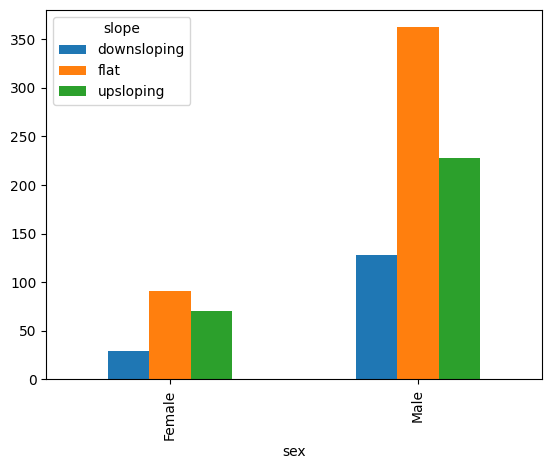

In [14]:
Data.groupby(['sex', 'slope']).size().unstack().plot(kind='bar')

In [15]:
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [16]:
Data.select_dtypes(include=['object']).columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Index([Axes(0.125,0.11;0.775x0.77), Axes(0.125,0.11;0.775x0.77),
       Axes(0.125,0.11;0.775x0.77), Axes(0.125,0.11;0.775x0.77),
       Axes(0.125,0.11;0.775x0.77), Axes(0.125,0.11;0.775x0.77)],
      dtype='object')

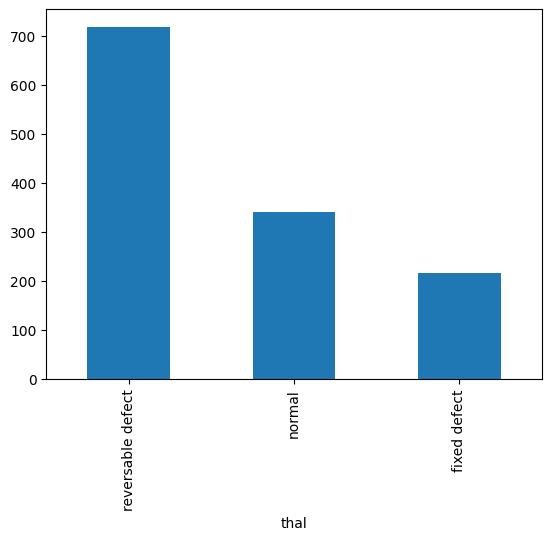

In [17]:
Data.select_dtypes(include=['object']).columns.map(lambda x: Data[x].value_counts().plot(kind='bar'))

<Axes: xlabel='restecg'>

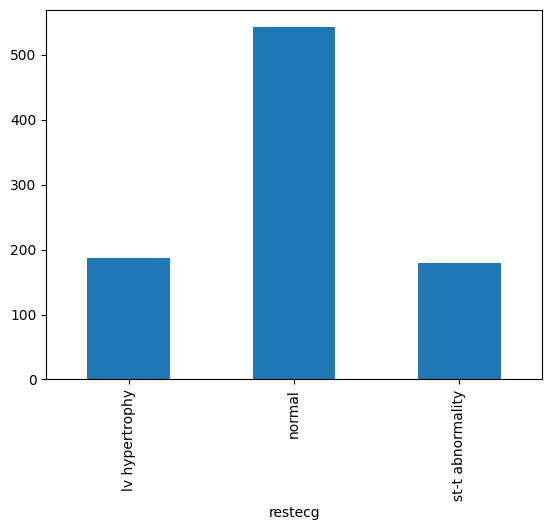

In [18]:
Data.groupby('restecg').size().plot(kind='bar')

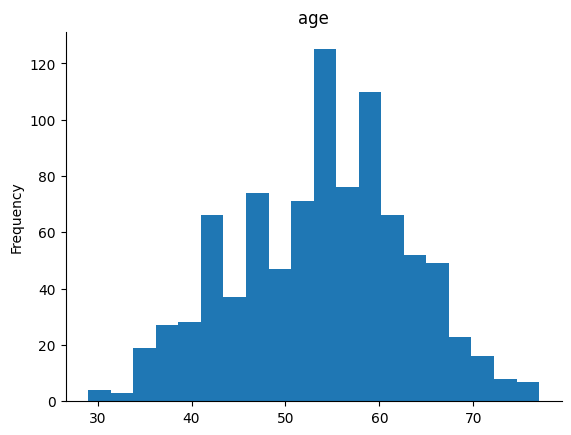

In [19]:
#age

from matplotlib import pyplot as plt
Data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# prompt: give me label encoding for above object variables using sklearn

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in Data.select_dtypes(include=['object']).columns:
    Data[col] = encoder.fit_transform(Data[col])

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
for col in Data.select_dtypes(include=['object']).columns:
  Data[col] = encoder.fit_transform(Data[col])

In [23]:
x = Data.iloc[:,1:13]

In [24]:
y = Data['slope']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=None)

In [26]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='mse', max_depth=None)

In [27]:
print(y_train.dtype)

int64


In [28]:
if pd.api.types.is_numeric_dtype(y_train):
    print("y_train is a continuous variable.")
else:
    print("y_train is not a continuous variable.")

y_train is a continuous variable.


In [29]:
if pd.api.types.is_numeric_dtype(y_train):
    model = DecisionTreeRegressor()

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
x_train = imputer.fit_transform(x_train)


# Now, fit the DecisionTreeRegressor model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
# Fit the imputer on the training data
x_train = imputer.fit_transform(x_train)

# Transform the test data using the same imputer
x_test = imputer.transform(x_test) # Apply the same transformation to the test data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [35]:
# Now the model can be used to predict on both x_train and x_test
model.predict(x_train)
model.predict(x_test)

array([0., 2., 2., 0., 0., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 0.,
       2., 0., 0., 2., 0., 1., 1., 1., 2., 0., 1., 2., 1., 2., 2., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
       2., 0., 2., 0., 1., 0., 1., 1., 0., 2., 2., 0., 2., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 2., 1., 0., 1., 2., 2., 2., 0.,
       2., 0., 2., 1., 0., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 0.,
       2., 0., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 0., 1.,
       2., 2., 2., 0., 2., 1., 0., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 0., 2., 2., 0., 0., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 0., 0., 1., 1., 2., 1.,
       1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 0., 0., 1., 1., 2., 2., 1., 1., 0.,
       1., 2., 0., 1., 1.

In [36]:
print("Accuracy on training set:", model.score(x_train, y_train))
print("Accuracy on test set:", model.score(x_test,y_test))

Accuracy on training set: 1.0
Accuracy on test set: 1.0


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

In [38]:
# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the entire dataset (x)
x = imputer.fit_transform(x)

# Now the model can be used to predict on both x_train and x_test
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Perform cross-validation on the imputed dataset
scores = cross_val_score(model, x, y, cv=5)

In [39]:
X =x_train
Y= y_train

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


In [41]:
print("cross validation scores:", scores)
print("Average cross validation:", scores.mean())

cross validation scores: [1. 1. 1. 1. 1.]
Average cross validation: 1.0


In [42]:
scores = cross_val_score(model, X, Y, cv=100)
#print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())
print("Accuracy on training set:", model.score(x_train, y_train))
print("Accuracy on test set:", model.score(x_test, y_test))

Average cross-validation score: 1.0
Accuracy on training set: 1.0
Accuracy on test set: 1.0


In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
print("Average cross validation  score:", scores.mean())
print("Accuracy on training set:", model.score(x_train, y_train))
print(" Accuracy on test set:", model.score(x_test, y_test))

Average cross validation  score: 1.0
Accuracy on training set: 1.0
 Accuracy on test set: 1.0


In [47]:
from sklearn.tree import export_graphviz

In [50]:
from sklearn.tree import export_graphviz

In [51]:
!pip install scikit-learn

In [53]:
!pip install graphviz

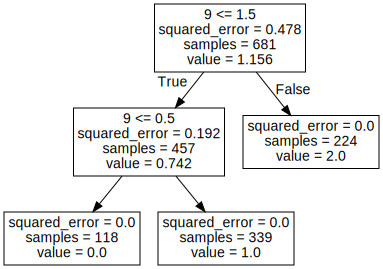

In [55]:
# Import the necessary modules
import pandas as pd
from sklearn.tree import export_graphviz
import graphviz

# Convert the NumPy array to a Pandas DataFrame
X_df = pd.DataFrame(X)

# Export the decision tree to a DOT file
dot_data = export_graphviz(model, out_file=None, feature_names=X_df.columns)

# Create a graph from the DOT file
graph = graphviz.Source(dot_data)

# Display the graph
graph

In [56]:
print("The number of nodes in the tree is:", model.tree_.node_count)
print("The depth of the tree is:", model.tree_.max_depth)

The number of nodes in the tree is: 5
The depth of the tree is: 2


In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=7)

In [58]:
y.dtypes

dtype('int64')

In [59]:
# Convert the NumPy array 'x' to a Pandas DataFrame
X_df = pd.DataFrame(x)
X_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

In [60]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [61]:
y_train.dtype

dtype('int64')

In [62]:
y_train_cv = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-validation scores for y_train:", y_train_cv)
print("Average cross-validation score for y_train:", y_train_cv.mean())

Cross-validation scores for y_train: [1. 1. 1. 1. 1.]
Average cross-validation score for y_train: 1.0


In [63]:
# application of Random forest classifier
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=500,max_samples=0.6,max_features=0.7,max_depth=7)

import numpy as np
training_accuracies = []
test_accuracies = []

from sklearn.metrics import accuracy_score
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    RF_classifier.fit(x_train,y_train)
    y_pred_train  = RF_classifier.predict(x_train)
    y_pred_test   = RF_classifier.predict(x_test)
    training_accuracies.append(accuracy_score(y_train,y_pred_train))
    test_accuracies.append(accuracy_score(y_test,y_pred_test))

print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  1.0
Cross validation Test Accuracy:  1.0


The importance of age is: 0.0
The importance of sex is: 0.0
The importance of cp is: 0.0
The importance of trestbps is: 0.0
The importance of chol is: 0.0
The importance of fbs is: 0.0
The importance of restecg is: 0.0
The importance of thalch is: 0.0
The importance of exang is: 0.0
The importance of oldpeak is: 1.0
The importance of slope is: 0.0
The importance of thal is: 0.0


[Text(0.6, 0.8333333333333334, 'x[9] <= 1.5\ngini = 0.616\nsamples = 635\nvalue = [113, 315, 207]'),
 Text(0.4, 0.5, 'x[9] <= 0.5\ngini = 0.389\nsamples = 428\nvalue = [113, 315, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 113\nvalue = [113, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 315\nvalue = [0, 315, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 207\nvalue = [0, 0, 207]')]

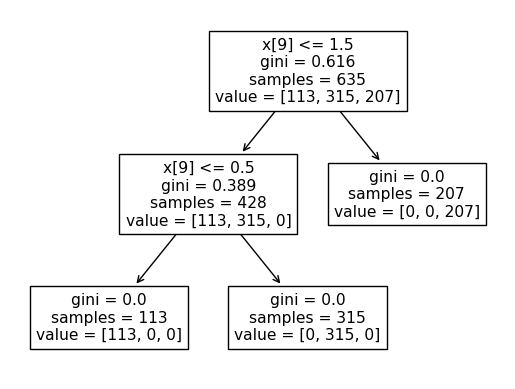

In [64]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Create a decision tree classifier and fit it to the training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Print each feature's importance
for feature, importance in zip(Data.columns, importances):
    print(f"The importance of {feature} is: {importance}")

# To visualize the tree, you can use the plot_tree function
tree.plot_tree(clf)
